# RNN(Recurrent Neural Network) 순환 신경망

- 텍스트 데이터  
    텍스트 데이터는 순서가 중요한 순차 데이터  
    **입력한 데이터를 기억하는 기능**이 매우 중요하다

    - ex) "별로지만 추천해요" : 추천은 하지만 "별로"라는 것을 기억해야 무작정 추천하지는 않을 것이다.

순환신경망에서의 활성화 함수: tanh함수  
tanh함수는 값을 -1~1사이값으로 만든다

In [21]:
from tensorflow import keras

In [22]:
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=300)

In [23]:
train_input.shape

(25000,)

In [24]:
# 218개의 단어로 이루어진 한 문장이다.
len(train_input[1])

189

In [25]:
train_target[:10]
# 1 = 긍정 / 2 = 부정

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [26]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target)

In [ ]:
# pad_sequences : 길이가 중구난방인 문장들을 maxlen을 기준으로 길이를 맞춰준다.
# 긴 경우는 잘라내고 짧은 경우는 0으로 채운다
# 잘라낼 때에는 앞에서부터 잘라낸다 -> 뒤에있는 단어가 더 중요하다고 판단한다.(모델 설계가 그렇게 되어있음, 바꿀수 있긴함)
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)

In [28]:
train_seq.shape

(18750, 100)

In [29]:
print(train_seq[0])

[ 61   2   2   2  39   2   5   2   2  13  66   2  36   2   2  12  36 161
  60  79   6   2   2  21  51  35   2  32 148   2  13 104 207 110  98  32
   5  24  31 266   8   2  15  13 161  40   5   2  10  10  94   6   2   4
   2   2   2 200   2   2   5   2  59   2 115 296  12   5  92   2   8   2
  29 105  11   2   2  26  38  11   2   5   4   2 200   4 156   9   2  12
  66  16   6   2 251  54  36   2  14 123]


In [30]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [31]:
val_seq.shape

(6250, 100)

In [32]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 300))) # 100의 token을 가지고 있고 300의 범위 안에있다
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

/Users/chojungseok/Desktop/code/DAMF2/ML/DL/DLvenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
train_oh = keras.utils.to_categorical(train_seq)

In [34]:
train_oh.shape

(18750, 100, 300)

In [36]:
train_oh[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
val_oh = keras.utils.to_categorical(val_seq)

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop,
              loss= 'binary_crossentropy',
              metrics = ['accuracy']
              )

es = keras.callbacks.EarlyStopping(patience=3)
result = model.fit(
    train_oh,
    train_target,
    epochs = 100,
    validation_data =(val_oh, val_target),
    callbacks = [es]

)

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5090 - loss: 0.6977 - val_accuracy: 0.5098 - val_loss: 0.6957
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5202 - loss: 0.6921 - val_accuracy: 0.5246 - val_loss: 0.6919
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5306 - loss: 0.6889 - val_accuracy: 0.5811 - val_loss: 0.6777
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5948 - loss: 0.6728 - val_accuracy: 0.6099 - val_loss: 0.6656
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6213 - loss: 0.6599 - val_accuracy: 0.6346 - val_loss: 0.6533
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6423 - loss: 0.6460 - val_accuracy: 0.6480 - val_loss: 0.6414
Epoch 7/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6549 - loss: 0.6350 - val_accuracy: 0.6590 - val_loss: 0.6323
Epoch 8/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6712 - loss: 0.6220 - val_accu

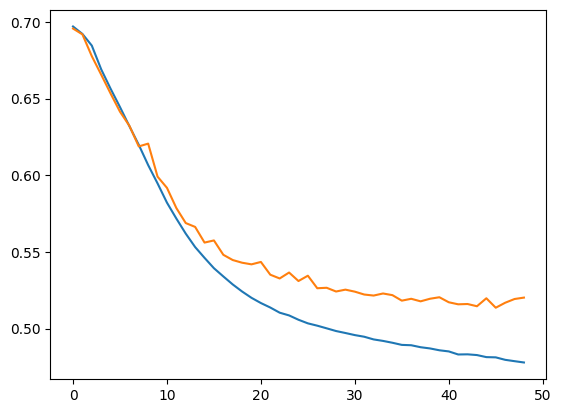

In [42]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])